# Analysis of Data and Method

## Load Data
First we have load_data_method_analysis.ipynb to load data,
then we can copy it and load our data

## Data Preprocessing
We try to preprocessing our data imag by using different method
and first we only do some simple work like cut the area of the object
and resize it into same size so that we can fill it into our CNN models


### Load Data


In [1]:
import os
import xml.etree.ElementTree as ET
import cv2 as cv
import matplotlib.pyplot as plt


the label dictionary is ----------
[{'x1': '111', 'y1': '1093', 'x2': '1515', 'y2': '1379', 'a5': 'Indicator_line', 'a6': 'line', 'a7': 'pedestrian_crossing', 'a8': 'white'}, {'x1': '807', 'y1': '966', 'x2': '924', 'y2': '1025', 'a5': 'prohibit_line', 'a6': 'line', 'a7': 'single_solid_line', 'a8': 'yellow'}]
the img shape and img are ----------
(1440, 2560, 3)


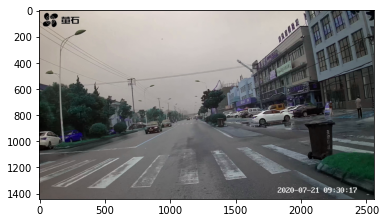

In [2]:
# we set this to be the name of data

name = '20200721093016'

label_dir = 'datasets/training_data/label'
label_file = name + '.xml'

img_dir = 'original_data/traffic_marking/'
img_file = name + '.jpg'

label_path = os.path.join(label_dir, label_file)
img_path = os.path.join(img_dir, img_file)

# ------------------- read label ------------------
xml_tree = ET.parse(label_path)
xml_root = xml_tree.getroot()

label_dict =[]
for object_block in xml_root.findall('object'):
    object_dict = {
        'x1': object_block.find('bndbox').find('x1').text,
        'y1': object_block.find('bndbox').find('y1').text,
        'x2': object_block.find('bndbox').find('x2').text,
        'y2': object_block.find('bndbox').find('y2').text,
        'a5': object_block.find('bndbox').find('a5').text,
        'a6': object_block.find('bndbox').find('a6').text,
        'a7': object_block.find('bndbox').find('a7').text,
        'a8': object_block.find('bndbox').find('a8').text,
    }
    label_dict.append(object_dict)
    # print(object_block.find('bndbox').find('a5').text)

print('the label dictionary is ----------')

print(label_dict)

# ------------------- read img -------------------
img = cv.imread(img_path)

print('the img shape and img are ----------')

print(img.shape)
plt.imshow(img)


In [3]:
# we make a copy for img, so that we will not change the original img
img_copy = img.copy()


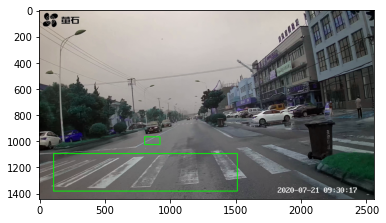

In [5]:
def get_right_axis(x1, y1, x2, y2):
    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1
    return x1, y1, x2, y2


for d in label_dict:
    x1, y1, x2, y2 = get_right_axis(d['x1'], d['y1'], d['x2'], d['y2'])
    cv.rectangle(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 5)

plt.imshow(img_copy)


### Draw the Object Img
We draw the object img according the axis of label dict


